In [25]:
from matplotlib import pyplot as plt
import numpy as np

# Gradient Descent
simple_data = []
for u1,u2 in zip(np.random.uniform(size=40),np.random.uniform(size=40)):
    simple_data.append([u1,u2,5*u1+9*u2+4])
    
    
data = np.loadtxt('ex1data2.txt', delimiter=',')

data= np.array(simple_data)

m = len(data)

y = data[:, -1]
X = data[:, 0:-1]

print("First 10 examples of the training set:")
print("X:")
print(X[0:10])
print("y:")
print(y[0:10])

def feature_normalize(X):
    # axis=0 gives column wise mean/std. axis=1 gives row wise mean/std.
    # Not specifiying axis returns the mean/std of all elements.
    mu = X.mean(axis=0)
    sigma = X.std(axis=0)
    X = (X - mu) / sigma
    return X, mu, sigma

X, mu, sigma = feature_normalize(X)

# temp_X = np.ones((m, X.shape[1] + 1))
# temp_X[:, 1:] = X
# X = temp_X
# del(temp_X)

X = np.hstack([np.ones((m, 1)), X])

alpha = 1
iterations = 400
theta = np.zeros(X.shape[1])

def compute_cost(X, y, theta):
    m = len(y)
    return sum((X.dot(theta) - y) ** 2) / (2 * m)

def gradient_descent(X, y, theta, alpha, iterations):
    m = len(y)
    J_history = np.zeros(iterations)
    for i in range(iterations):
        # delta = (1 / m) * sum(((X.dot(theta) - y) * X.T).T)
        # delta = (1 / m) * np.sum(X.T * (h - y), axis=1)
        delta = (1 / m) * ((X.dot(theta) - y).dot(X))
        theta = theta - alpha * delta
        new_cost = compute_cost(X, y, theta)
        print("{}. theta = {}, cost = {}".format(i, theta, new_cost))
        J_history[i] = new_cost;
    return theta, J_history

print('Running gradient descent...')
theta, J_history = gradient_descent(X, y, theta, alpha, iterations);

print('Theta found by gradient descent = {}'.format(theta))




First 10 examples of the training set:
X:
[[0.54365308 0.06201826]
 [0.22399171 0.89640733]
 [0.7639898  0.79321177]
 [0.03163239 0.75244053]
 [0.39048065 0.5781224 ]
 [0.46022141 0.47244263]
 [0.48786057 0.34654648]
 [0.57760168 0.61111367]
 [0.60660144 0.56130522]
 [0.2807118  0.75826223]]
y:
[ 7.27642973 13.18762445 14.95885491 10.93012674 11.15550485 10.55309072
  9.55822114 12.38803147 12.08475419 12.22791908]
Running gradient descent...
0. theta = [11.05464392  1.01071533  2.36327565], cost = 0.1159995792984522
1. theta = [11.05464392  1.42174619  2.53906352], cost = 0.003508944657799204
2. theta = [11.05464392  1.45231996  2.61055174], cost = 0.00010614428678071906
3. theta = [11.05464392  1.46475349  2.61586926], cost = 3.210825679778538e-06
4. theta = [11.05464392  1.46567834  2.61803175], cost = 9.712629721872161e-08
5. theta = [11.05464392  1.46605445  2.6181926 ], cost = 2.9380348085491626e-09
6. theta = [11.05464392  1.46608242  2.61825802], cost = 8.887447358540287e-11
7.

Predicted price of a 3 bedroom, 1650 sqft. house (using gradient descent) = $ 8281.0


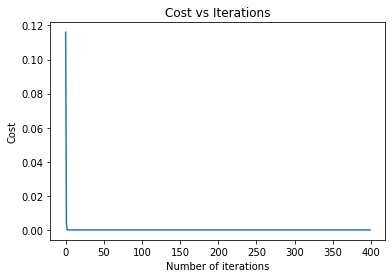

In [26]:
# Predicting the price of a 1650 sqft. 3 bedroom house.
x = np.array([1650, 3])
x = (x - mu) / sigma
x = np.hstack([1, x])
print("Predicted price of a 3 bedroom, 1650 sqft. house (using gradient descent) = $", x.dot(theta))
plt.title("Cost vs Iterations")
plt.xlabel("Number of iterations")
plt.ylabel("Cost")
plt.plot(J_history)
plt.show()
